In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 14,6

In [3]:
series = [3,10,12,13,12,10,12]

In [4]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series):
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

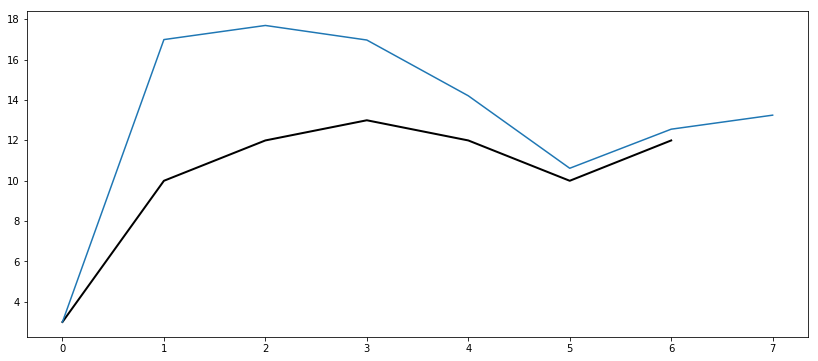

In [5]:
plt.plot(series, linewidth=2, label='Original Series', color='black')
plt.plot(double_exponential_smoothing(series, 0.9, 0.4))
plt.show()

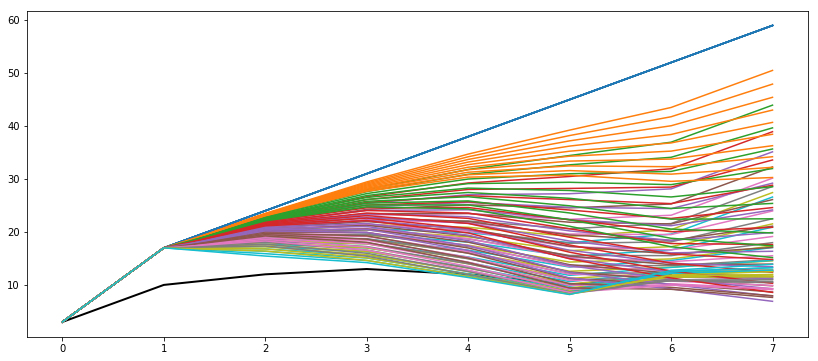

In [6]:
plt.plot(series, linewidth=2, label='Original Series', color='black')
for item_beta in [x * 0.1 for x in range(0, 10)]:
    for item_alpha in [x * 0.1 for x in range(0, 10)]:
        plt.plot(double_exponential_smoothing(series, item_alpha, item_beta))
plt.show()